In [13]:
import numpy as np
import cv2 as cv
img = cv.imread('Eiffel_Tower.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)

True

In [11]:
len(kp)

959

In [30]:
import cv2 as cv
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

In [31]:
def get_detector():
    
    params={}
    params["n_features"]=50
    #params["n_features"]=240
    params["n_octave_layers"]=3
    params["contrast_threshold"]=0.04
    params["edge_threshold"]=10
    params["sigma"]=1.6

    detector = cv2.xfeatures2d.SIFT_create(
            nfeatures=params["n_features"],
            nOctaveLayers=params["n_octave_layers"],
            contrastThreshold=params["contrast_threshold"],
            edgeThreshold=params["edge_threshold"],
            sigma=params["sigma"])

    return detector

In [32]:
#img = cv.imread('Eiffel_Tower.jpg')
img = cv.imread('road_sign.jpg')

sift = get_detector()
kp = sift.detect(img,None)

p = cv.drawKeypoints(img,kp,img)
#cv.imwrite('ET_KP.jpg',p)
cv.imwrite('RS_KP.jpg',p)

True

In [25]:
#step 2

In [34]:
def rotate_clockwise(image, angle):
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    rotated = cv2.warpAffine(image, M, (nW, nH))
    return rotated

In [52]:
rp = rotate_clockwise(p, 45)
cv.imwrite('R_RS_KP.jpg',rp)

True

In [ ]:
#step 3

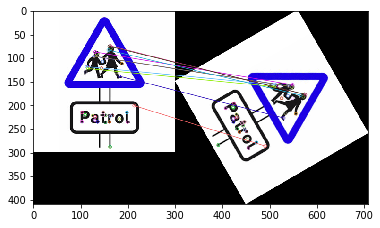

(<matplotlib.image.AxesImage at 0x115e44090>, None)

In [38]:
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(p,None)
kp2, des2 = orb.detectAndCompute(rp,None)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(p,kp1,rp,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [53]:
bf = cv2.BFMatcher()
kp1, des1 = sift.detectAndCompute(p, None)
kp2, des2 = sift.detectAndCompute(rp, None)
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(p, kp1, rp, kp2, good,
                            None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2.imwrite('result45.jpg',img3)

True